# Relación entre `Distance` y `ArrDelay`

La idea de este plot es ver la relacion entre `Distance` y `ArrDelay`. No se encontró relación significativa.

In [23]:
import seaborn as sns
import pandas as pd
import numpy as np
import time
import os
import shutil
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

sns.set(color_codes=True)

import sys
sys.path.append('../src')
import reader

%matplotlib inline

Ploteo la relacion entre distancia y delay.

Leyendo datos para el año 1994
Ploteando


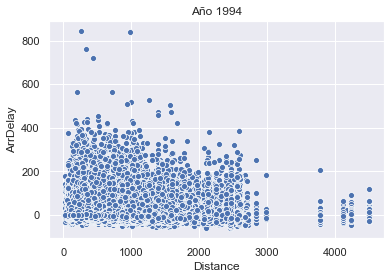

Leyendo datos para el año 1998
Ploteando


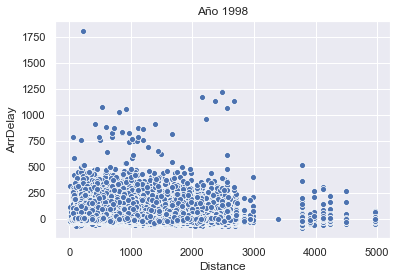

Leyendo datos para el año 2002
Ploteando


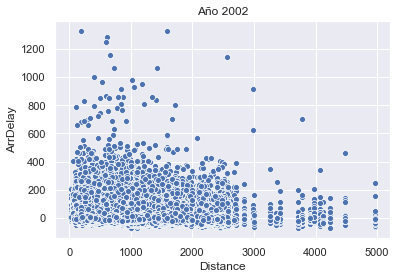

Leyendo datos para el año 2006
Ploteando


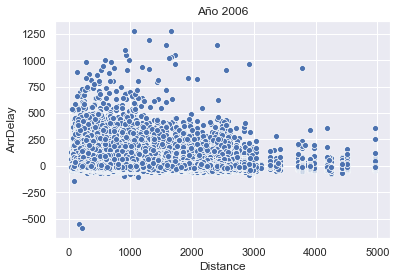

In [14]:
for year in range(1994, 2009, 4):
    
    print(f'Leyendo datos para el año {year}...')
    flights = reader.read_flights(year).sample(frac=.1)

    print('Ploteando...')
    sns.scatterplot(x='Distance', y='ArrDelay', data=flights)
    plt.title(f'Año {year}')
    plt.show()

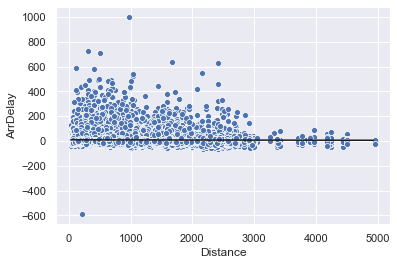

In [36]:
def linmodel(flights):
    flights = flights.loc[:, ['Distance', 'ArrDelay']]
    flights.dropna(inplace=True)

    X = flights['Distance'].values.reshape(-1, 1)
    y = flights['ArrDelay'].values.reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(X, y)
    return lr


lr = linmodel(flights)

distances = np.arange(flights['Distance'].min(),
                      flights['Distance'].max(),
                      100)
delay_pred = lr.predict(distances.reshape(-1, 1))

sns.scatterplot(x='Distance', y='ArrDelay',
                data=flights.sample(frac=.1))
sns.lineplot(x=distances, y=delay_pred.reshape(-1), color='k')
plt.show()

In [26]:
lr.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [33]:
delay_pred.shape

(50, 1)